# Logistic Regression Analysis

In this study I will be using Logistic Regression classification to indicate whether a user clicked on an advertisement. I will create a model that will predict whether or not a user will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': cutomer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use("fivethirtyeight")

## Get the Data

In [30]:
data = pd.read_csv("/Users/kingchris/Desktop/Data Workspace/logitproj.csv")
data.head(20)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/16 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/16 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/16 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/16 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/16 3:36,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/16 14:30,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,1/28/16 20:59,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,3/7/16 1:40,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,4/18/16 9:33,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,7/11/16 1:42,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [32]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# 1. Exploratory Data Analysis

Text(0.5, 0, 'Age')

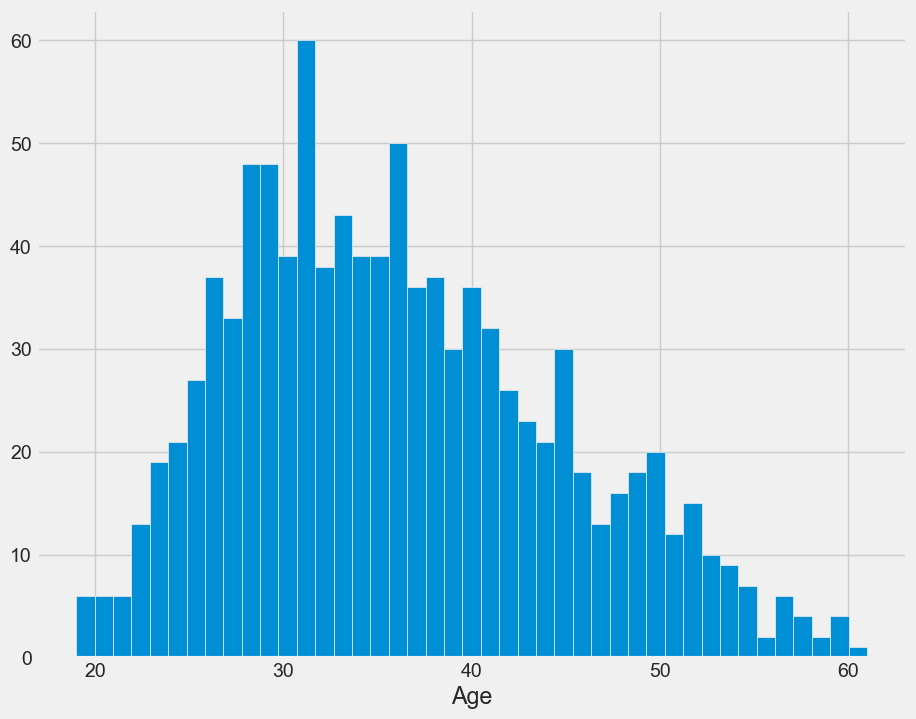

In [33]:
plt.figure(figsize=(10, 8))
data.Age.hist(bins=data.Age.nunique())
plt.xlabel('Age')

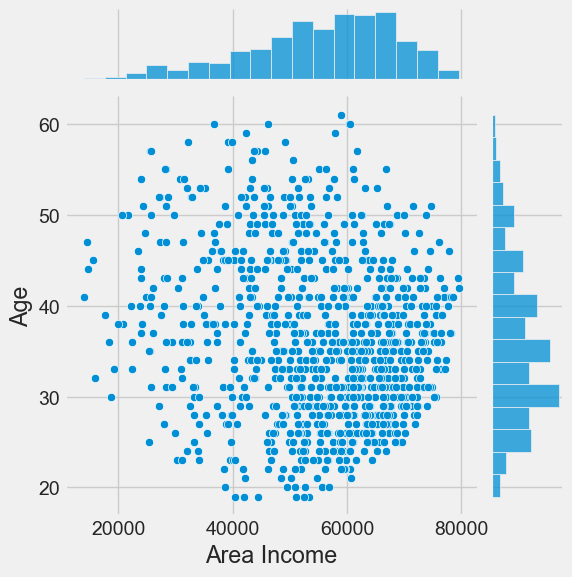

In [38]:
sns.jointplot(x=data["Area Income"], y=data["Age"])

In [40]:
#sns.jointplot(data["Area Income"], data.Age) (this is the old line which was corrected above)

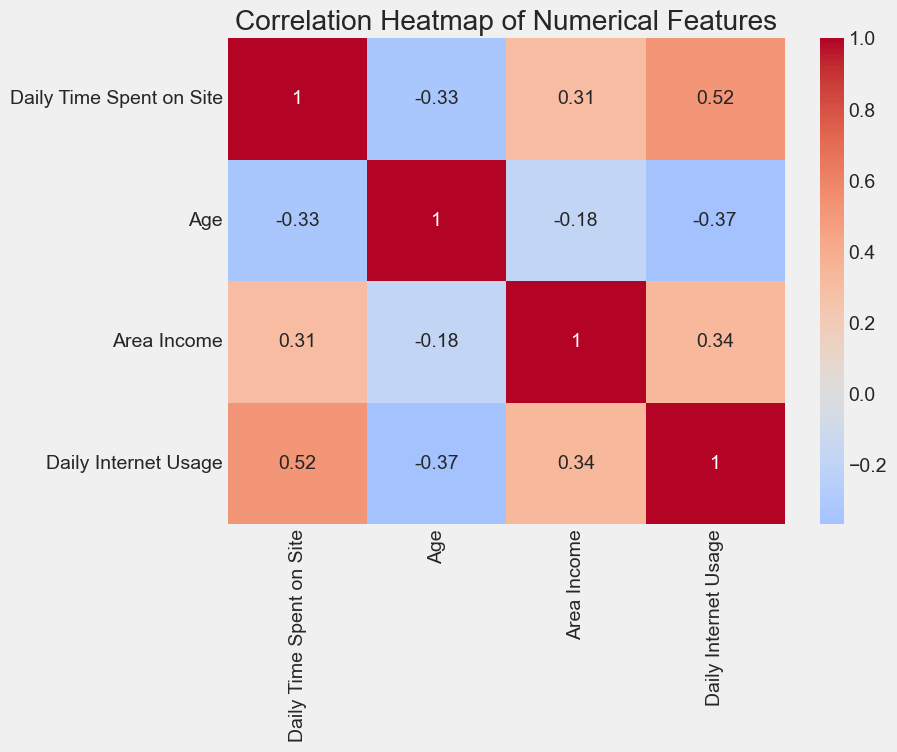

In [41]:
# Assuming 'data' is your dataset containing the numerical features
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

A series of bar plots to visualize the relationship between each of your numerical features and the binary outcome "Clicked on Ad" to understand how each numerical feature might affect the likelihood of someone clicking on an ad.

/Users/kingchris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


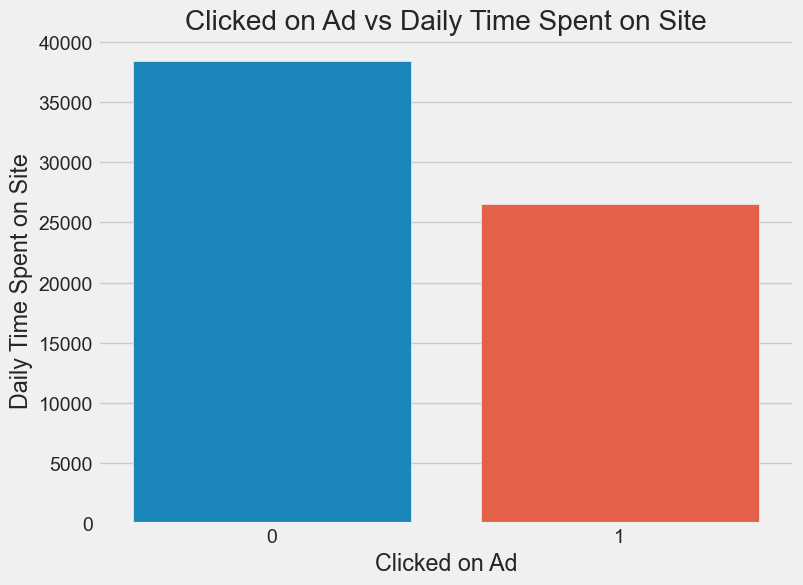

/Users/kingchris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


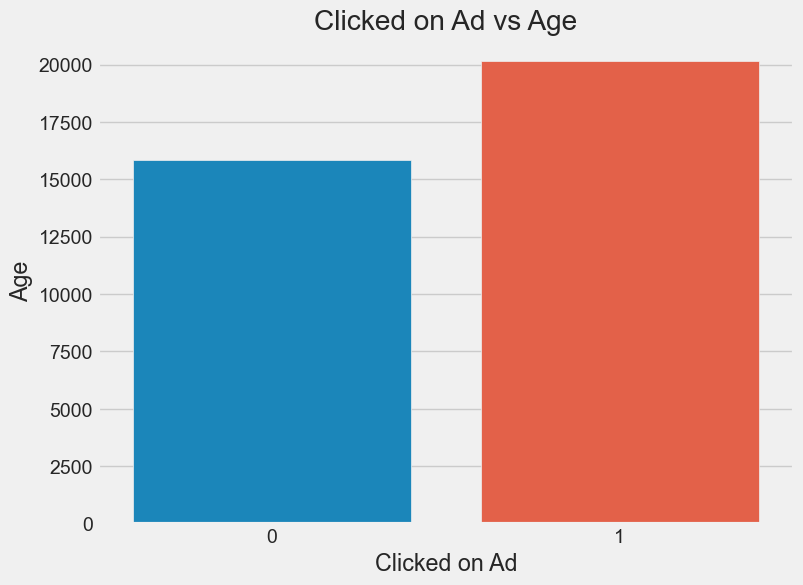

/Users/kingchris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


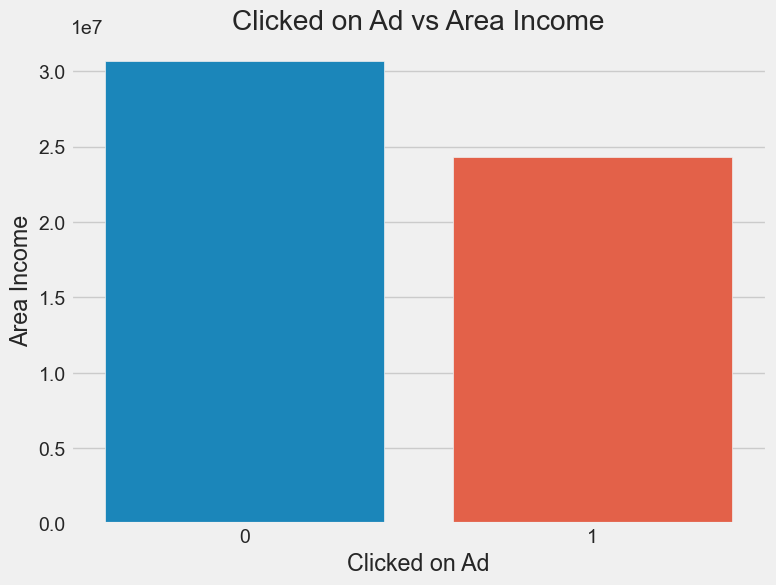

/Users/kingchris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


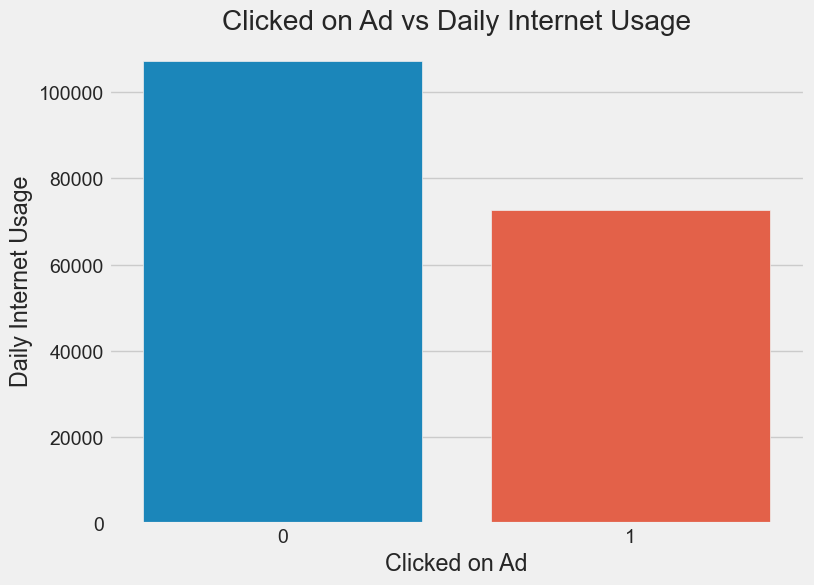

In [44]:
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Loop through each numerical feature and create bar plots
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Clicked on Ad', y=feature, data=data, estimator=sum, ci=None)
    plt.title(f'Clicked on Ad vs {feature}')
    plt.ylabel(feature)
    plt.xlabel('Clicked on Ad')
    plt.show()

In this code, I've specified the x and y arguments to indicate which columns from the dataset should be used for the x and y axes. Additionally, I've added the kind='kde' argument to create a kernel density estimate plot in the center of the joint plot. This plot will show the estimated distribution of the data points along both axes.

Remember to replace 'Daily Time Spent on Site' and 'Age' with the actual column names from your dataset.

This type of visualization can help you understand the joint distribution and potential correlations between two numerical variables, in this case, "Daily Time Spent on Site" and "Age."

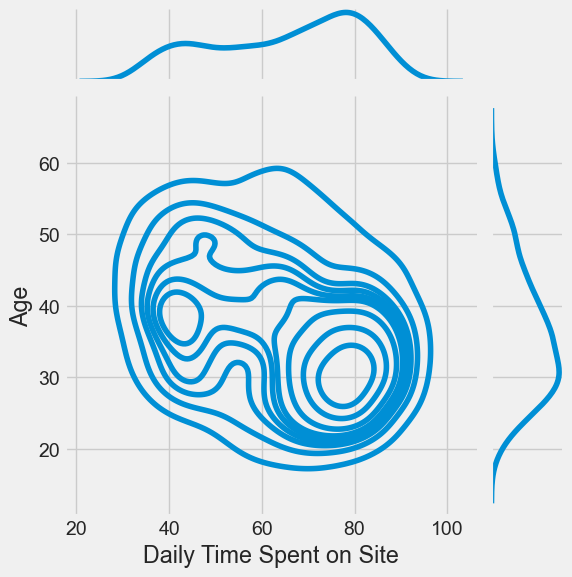

In [46]:
sns.jointplot(x='Daily Time Spent on Site', y='Age', data=data, kind='kde')
plt.show()

In this code, the sns.kdeplot() function is used to create a 2D kernel density estimate plot (density heatmap). The x and y arguments indicate which columns to use for the x and y axes. The cmap argument specifies the color map to use, and fill=True fills the contours of the density plot.

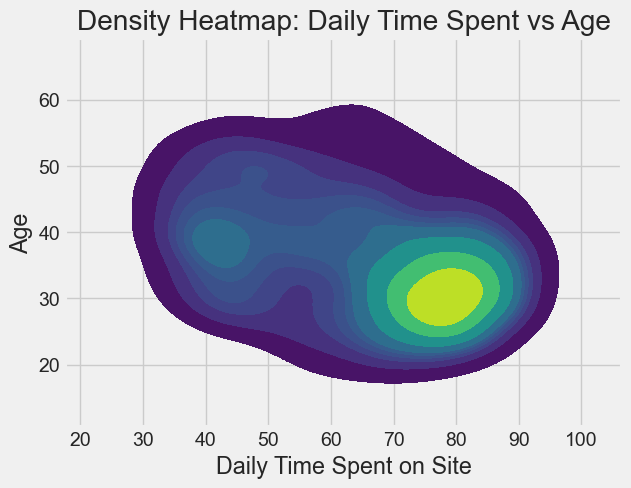

In [48]:
sns.kdeplot(data=data, x='Daily Time Spent on Site', y='Age', cmap='viridis', fill=True)
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Age')
plt.title('Density Heatmap: Daily Time Spent vs Age')
plt.show()

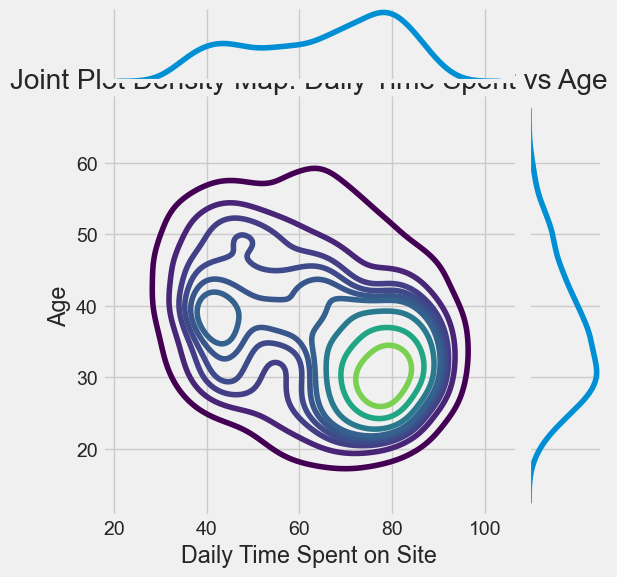

In [49]:
sns.jointplot(data=data, x='Daily Time Spent on Site', y='Age', kind='kde', cmap='viridis')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Age')
plt.title('Joint Plot Density Map: Daily Time Spent vs Age')
plt.show()

In [50]:
sns.jointplot(data["Daily Time Spent on Site"], data.Age, kind='kde')

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

This code will generate a heatmap that displays the correlation coefficients between the selected numerical features. Positive correlations will be represented by warmer colors, while negative correlations will be represented by cooler colors. The annotation on the heatmap cells will show the actual correlation values.

This kind of visualization can help you identify relationships between numerical features in your data and guide your understanding of how these features might be related to each other.

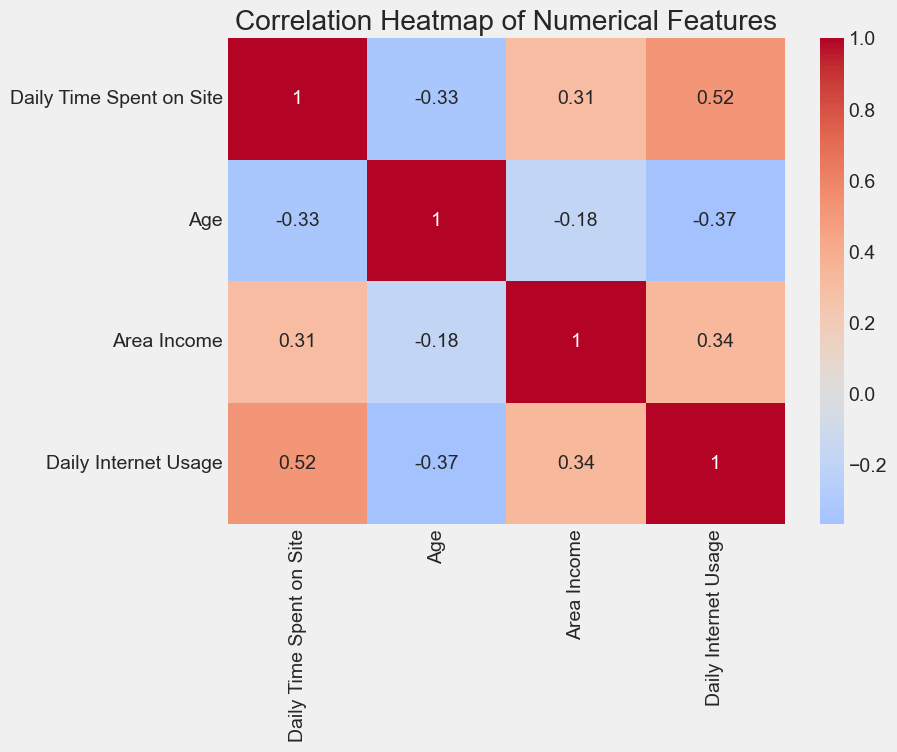

In [43]:
# Assuming 'data' is your dataset containing the numerical features
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The code sns.pairplot(data) will generate a grid of scatter plots for all pairs of numerical features in your dataset. Each scatter plot will show the relationship between two numerical variables, and the diagonal of the grid will display histograms or density plots for each individual variable.

Here's what each part of the code does:

sns.pairplot(data): This function from the Seaborn library creates a pair plot. It takes the entire dataset (data) as input.
The resulting pair plot will provide a visual overview of how each numerical variable in your dataset relates to every other numerical variable. This can be helpful for identifying potential patterns, trends, and correlations between variables. Scatter plots allow you to visually assess the relationships between pairs of variables, while the histograms or density plots on the diagonal help you understand the distribution of each individual variable.

Pair plots are commonly used in exploratory data analysis (EDA) to quickly gain insights into the relationships within a dataset. They can be particularly useful for identifying linear relationships, outliers, and potential areas of interest for further analysis.

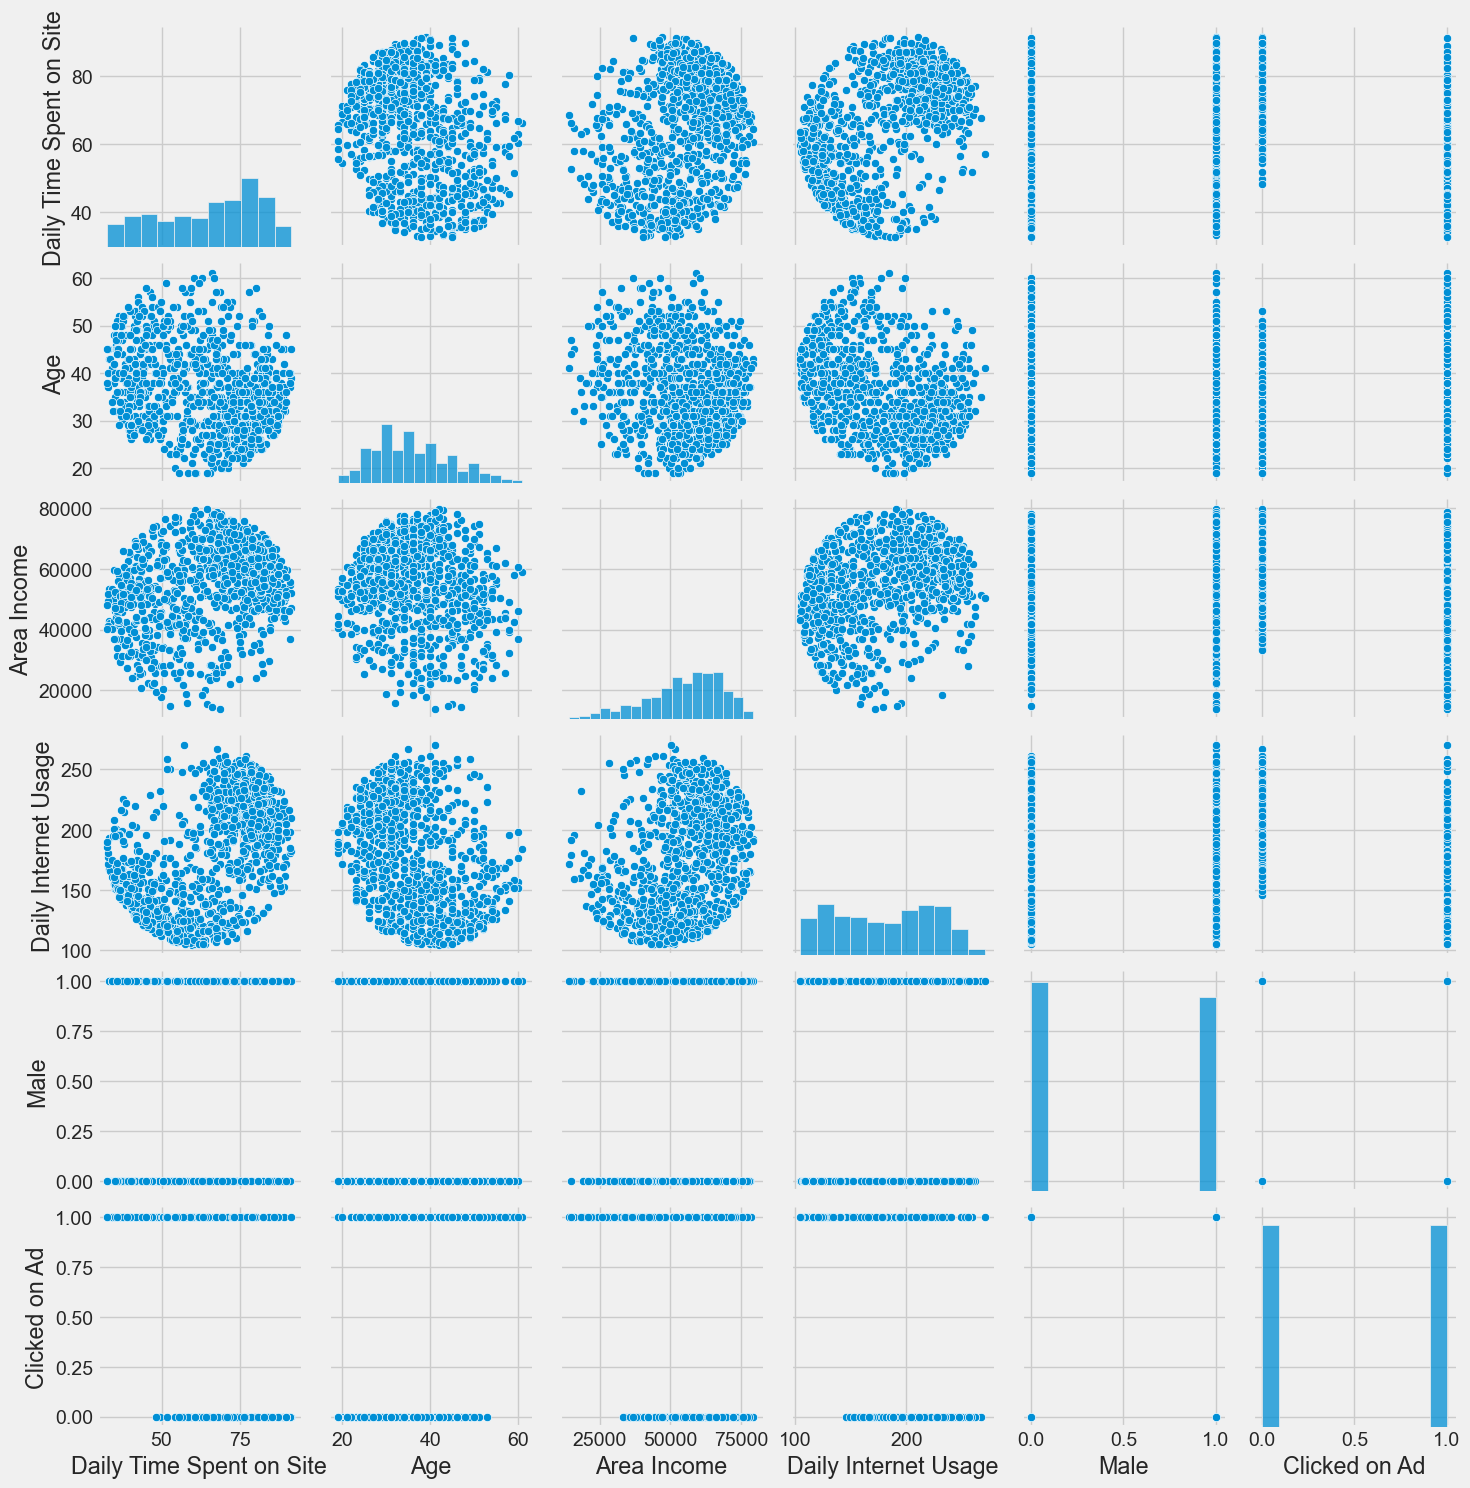

In [52]:
sns.pairplot(data)

A pair plot similar to the one above but also incorporate color to distinguish data points based on the "Clicked on Ad" variable. This can be particularly useful for visualizing how the relationships between pairs of numerical variables might differ between the two classes (clicked on ad or not clicked on ad).

Each scatter plot in the pair plot grid will now display points with different colors according to whether the corresponding data point was clicked on an ad (1) or not (0). This can help you visually assess any differences or patterns between the two classes across various pairs of numerical features.

The pair plot with the added hue can be valuable for understanding how different numerical features might contribute to the distinction between users who clicked on an ad and those who didn't. It can provide insights into potential relationships and differences in distributions between the two classes.

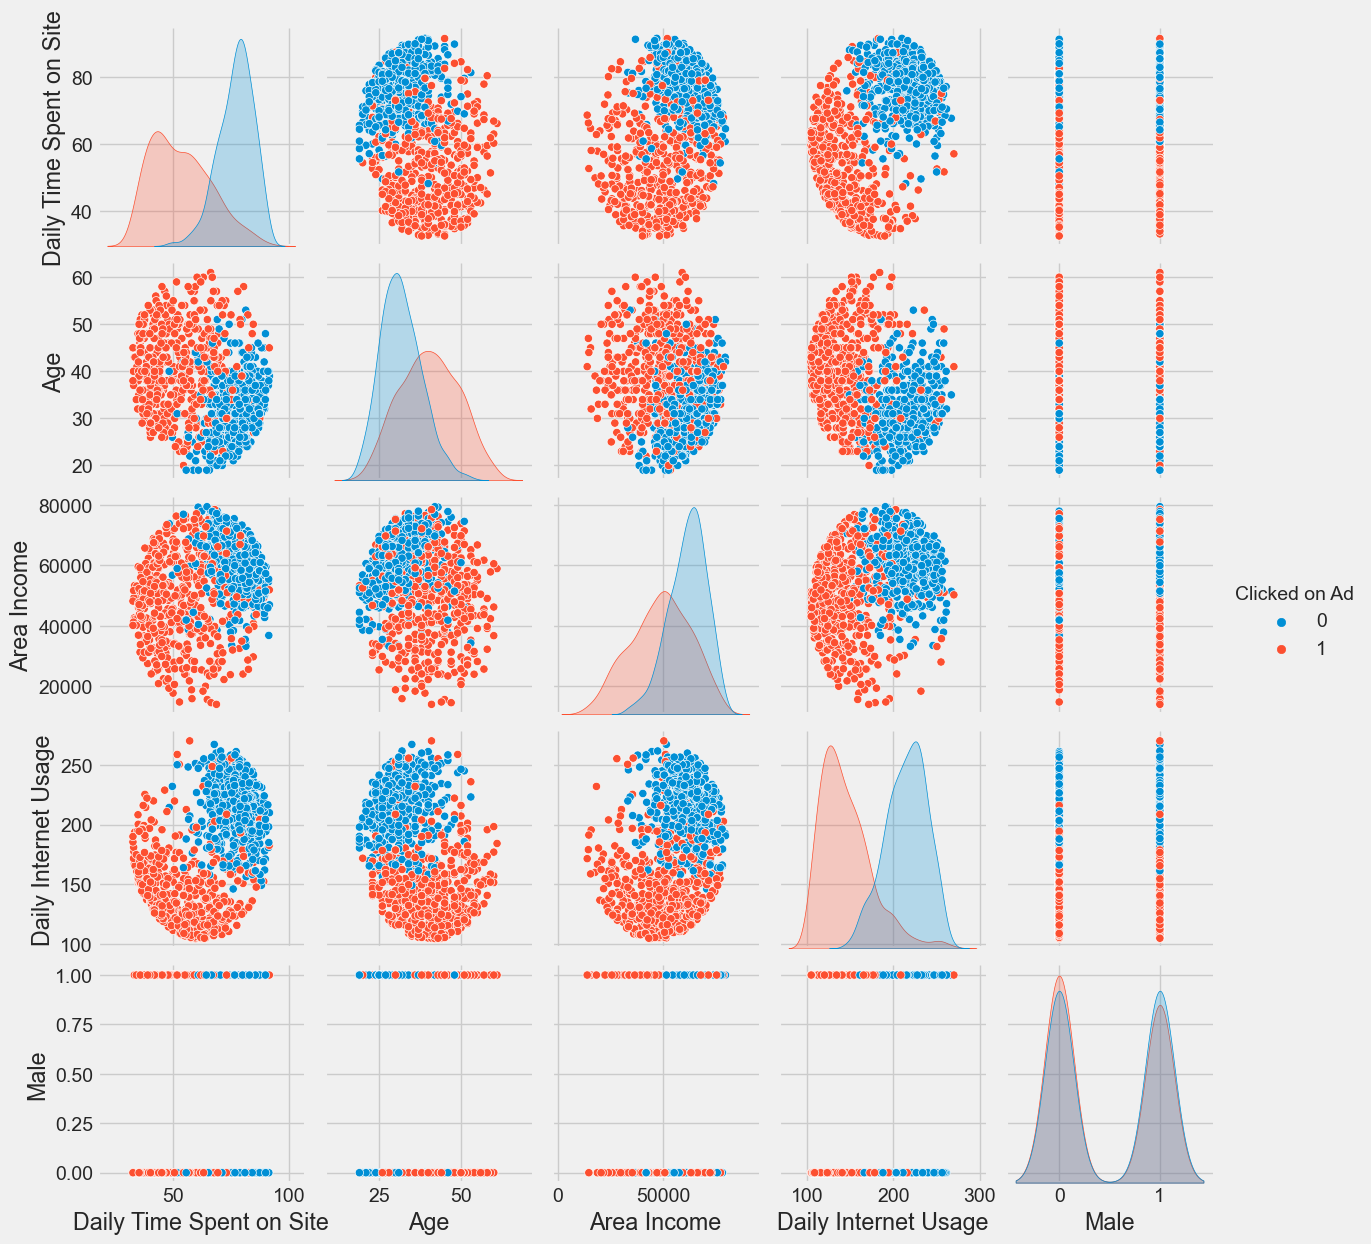

In [56]:
sns.pairplot(data,hue='Clicked on Ad' )

In [54]:
data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

<AxesSubplot:>

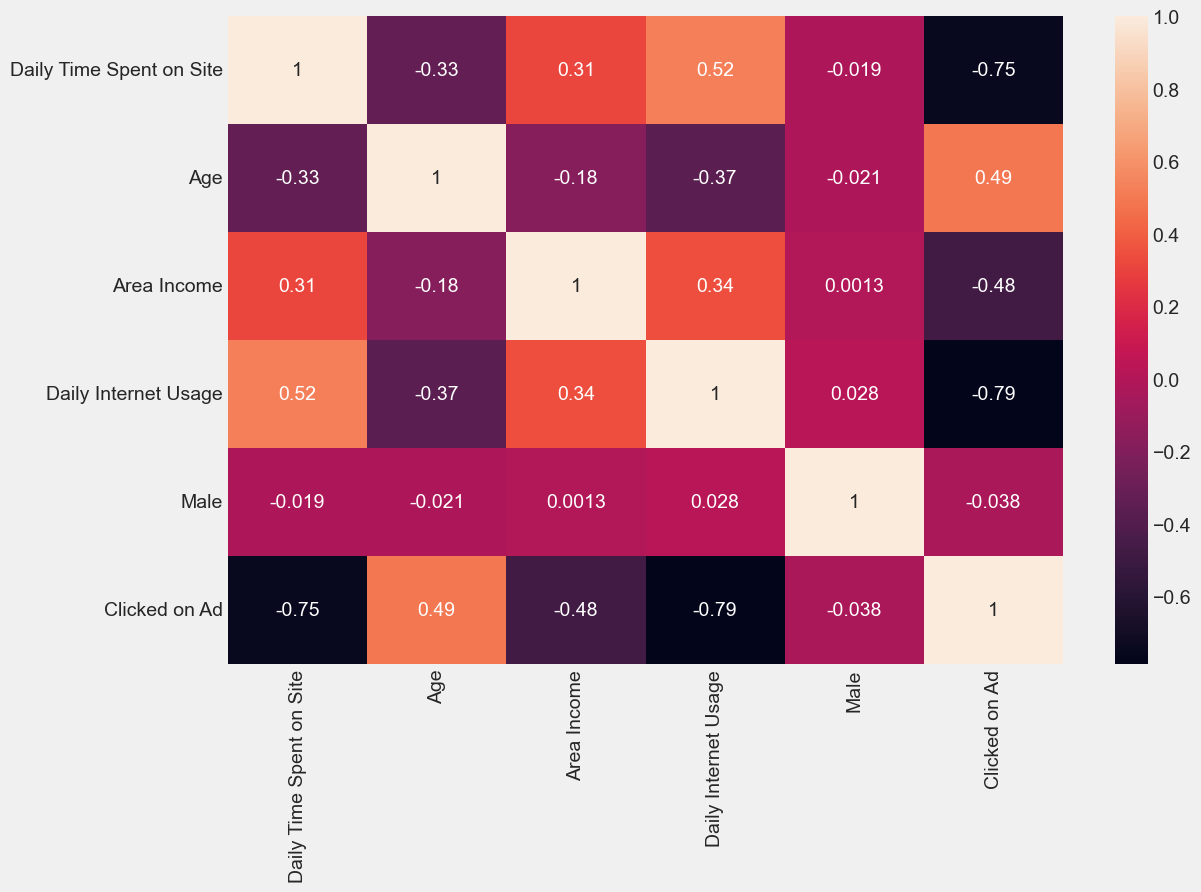

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)

The function is designed to provide a comprehensive overview of the classification model's performance by displaying the accuracy, classification report (which includes precision, recall, F1-score, and support for each class), and the confusion matrix (which shows the true positive, true negative, false positive, and false negative counts).

This function is useful for quickly assessing how well a classification model is performing on both training and testing data and can be especially helpful during model development and evaluation phases.

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Reasons of using scikit-learn (not pandas) for ML preprocessing:
1. You can cross-validate the entire workflow.
2. You can grid search model & preprocessing hyperparameters.
3. Avoids adding new columns to the source DataFrame.
4. Pandas lacks separate fit/transform steps to prevent data leakage.

Preprocessing and model selection modules to prepare the data for machine learning tasks. The result is that the numerical columns in both the training and testing sets are scaled using both the MinMaxScaler and StandardScaler, while the non-numerical columns remain unchanged. This preprocessing is important for ensuring that the features have similar scales, which can improve the performance of machine learning models.

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cat_columns = []
num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']


ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# 3. Prepare Data for Logistic Regression
The assumptions made by logistic regression about the distribution and relationships in your data are much the same as the assumptions made in linear regression.

Much study has gone into defining these assumptions and precise probabilistic and statistical language is used. My advice is to use these as guidelines or rules of thumb and experiment with different data preparation schemes.

Ultimately in predictive modeling machine learning projects you are laser focused on making accurate predictions rather than interpreting the results. As such, you can break some assumptions as long as the model is robust and performs well.

- **Binary Output Variable:** This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.
- **Remove Noise:** Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.
- **Gaussian Distribution:** Logistic regression is a linear algorithm (with a non-linear transform on output). It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model. For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.
- **Remove Correlated Inputs:** Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.
- **Fail to Converge:** It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

# 4. Implimenting Logistic Regression in Scikit-Learn

This code performs binary classification using a logistic regression model, evaluates its performance, and prints the results using the print_score function defined earlier. It gives a comprehensive overview of how well the logistic regression model is performing on both the training and testing data. It helps understand its ability to correctly classify instances and identify any potential issues, such as overfitting or underfitting.

The print_score function calculates and displays the following metrics for both the training and testing datasets:

*Accuracy score
*Classification report (including precision, recall, F1-score, and support for each class)
*Confusion matrix


In [59]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.964088    0.985207  0.974286    0.974648      0.974527
recall       0.985876    0.962428  0.974286    0.974152      0.974286
f1-score     0.974860    0.973684  0.974286    0.974272      0.974279
support    354.000000  346.000000  0.974286  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[349   5]
 [ 13 333]]

Test Result:
Accuracy Score: 97.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.959732    0.980132      0.97    0.969932      0.970204
recall       0.979452    0.961039      0.97    0.970246      0.970000
f1-score     0.969492    0.970492      0.97    0.969992      0.970005
support    146.000000  154.000000      0.97  300.000000    300.

Train Result:

Accuracy Score: 97.43%: The model has achieved a high accuracy of approximately 97.43% on the training data. This indicates that it correctly predicted the class for the majority of instances in the training set.

Precision, Recall, and F1-Score: The classification report breaks down the precision, recall, and F1-score for both classes (0 and 1).
Precision: The model has high precision for both classes, indicating that when it predicts a class, it is generally accurate.
Recall: The recall values are also high, indicating that the model is able to correctly identify instances of both classes.
F1-Score: The F1-scores are well-balanced for both classes, suggesting a good balance between precision and recall.


Confusion Matrix: The confusion matrix provides a visual representation of the classification results. The numbers in the diagonal represent the correct predictions, while off-diagonal numbers are incorrect predictions.
In class 0 (not clicked on ad), 349 instances were correctly classified, and 5 instances were misclassified as class 1.
In class 1 (clicked on ad), 333 instances were correctly classified, and 13 instances were misclassified as class 0.

Test Result:

Accuracy Score: 97.00%: The model also achieved a high accuracy of approximately 97.00% on the testing data. This indicates that it generalizes well to unseen data.
Precision, Recall, and F1-Score: The classification report for the testing data shows similar patterns as the training data.
Precision, recall, and F1-scores are high for both classes, indicating consistent performance.

Confusion Matrix: The confusion matrix for the testing data is also consistent with the training data, showing good classification performance.

Overall, the logistic regression model appears to be performing very well on this task, achieving high accuracy, precision, recall, and F1-scores on both the training and testing data. These results suggest that the model is effectively capturing the relationships between the features and the target variable "Clicked on Ad." However, it's also important to consider potential issues such as overfitting, the distribution of classes, and the suitability of the evaluation metrics for your specific use case.

This code performs binary classification using a Random Forest classifier, evaluates its performance, and prints the results using the print_score function. Here's what each part of the code does:

The 'print_score' function calculates and displays the following metrics for both the training and testing datasets:

Accuracy score
Classification report (including precision, recall, F1-score, and support for each class)
Confusion matrix

By running this code, I get a comprehensive overview of how well the Random Forest classifier is performing on both the training and testing data. This information helps you assess its ability to correctly classify instances and compare its performance with that of the logistic regression model you evaluated earlier.

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    354.0  346.0       1.0      700.0         700.0
_______________________________________________
Confusion Matrix: 
 [[354   0]
 [  0 346]]

Test Result:
Accuracy Score: 96.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.946667    0.973333      0.96    0.960000      0.960356
recall       0.972603    0.948052      0.96    0.960327      0.960000
f1-score     0.959459    0.960526      0.96    0.959993      0.960007
support    146.000000  154.000000      0.96  300.000000    300.000000
_______________________________________________

Train Result:

Accuracy Score: 100.00%: The model has achieved a perfect accuracy of 100.00% on the training data. This indicates that it correctly predicted the class for all instances in the training set.
Precision, Recall, and F1-Score: The classification report shows perfect precision, recall, and F1-scores for both classes (0 and 1). All metrics are 1.0, which means the model perfectly separates the classes.
Confusion Matrix: The confusion matrix confirms that there are no misclassifications on the training data. All instances are correctly classified, resulting in a diagonal matrix with all non-zero values on the diagonal.

Test Result:

Accuracy Score: 96.00%: The model achieved a high accuracy of approximately 96.00% on the testing data. This indicates that it generalizes well to unseen data, but it's slightly below the perfect accuracy achieved on the training data.
Precision, Recall, and F1-Score: The classification report for the testing data shows high precision, recall, and F1-scores for both classes.
Confusion Matrix: The confusion matrix for the testing data indicates that the model misclassified a small number of instances. It correctly classified the majority of instances, but there are a few false positive and false negative predictions.

Overall, the Random Forest classifier is performing exceptionally well on both the training and testing datasets. However, achieving a perfect accuracy on the training data could be an indication of potential overfitting. It's important to consider the possibility of overfitting when evaluating model performance. Additionally, while the results on the testing data are very good, it's important to assess the model's performance on a broader range of datasets and consider factors such as class imbalances, hyperparameter tuning, and model interpretability.

Model comparison

Comparing the results of the two models, the Logistic Regression classifier and the Random Forest classifier, based on the evaluation metrics provided for both the training and testing datasets.

Logistic Regression Model:

Train Result:

Accuracy Score: 97.43%
Precision (Class 0): 0.964
Precision (Class 1): 0.985
Recall (Class 0): 0.986
Recall (Class 1): 0.962
F1-Score (Class 0): 0.975
F1-Score (Class 1): 0.974
Test Result:

Accuracy Score: 97.00%
Precision (Class 0): 0.960
Precision (Class 1): 0.980
Recall (Class 0): 0.979
Recall (Class 1): 0.961
F1-Score (Class 0): 0.969
F1-Score (Class 1): 0.970
Random Forest Model:

Train Result:

Accuracy Score: 100.00%
Precision (Class 0): 1.000
Precision (Class 1): 1.000
Recall (Class 0): 1.000
Recall (Class 1): 1.000
F1-Score (Class 0): 1.000
F1-Score (Class 1): 1.000
Test Result:

Accuracy Score: 96.00%
Precision (Class 0): 0.947
Precision (Class 1): 0.973
Recall (Class 0): 0.973
Recall (Class 1): 0.948
F1-Score (Class 0): 0.959
F1-Score (Class 1): 0.961

Comparison:

Accuracy: The Random Forest model achieved a slightly higher accuracy on the training data (100.00% vs. 97.43%), but a slightly lower accuracy on the testing data (96.00% vs. 97.00%) compared to the Logistic Regression model.

Precision and Recall: Both models have high precision and recall values for both classes. The Random Forest model's perfect scores on the training data suggest it's able to perfectly separate the classes, but it's important to be cautious of potential overfitting.

F1-Score: The F1-scores are generally high for both models and both classes, indicating a good balance between precision and recall.

In general, both models perform well on this task. The Logistic Regression model appears to be slightly more conservative in its predictions, as evidenced by its slightly higher precision scores. The Random Forest model achieves perfect accuracy on the training data, but its accuracy on the testing data is slightly lower, suggesting that it might be overfitting to some extent. The choice between these models could depend on factors such as interpretability, computational complexity, and the potential for overfitting.

It's recommended to further evaluate and fine-tune the models, potentially using techniques such as cross-validation and hyperparameter tuning, to get a more comprehensive understanding of their performance on different datasets.

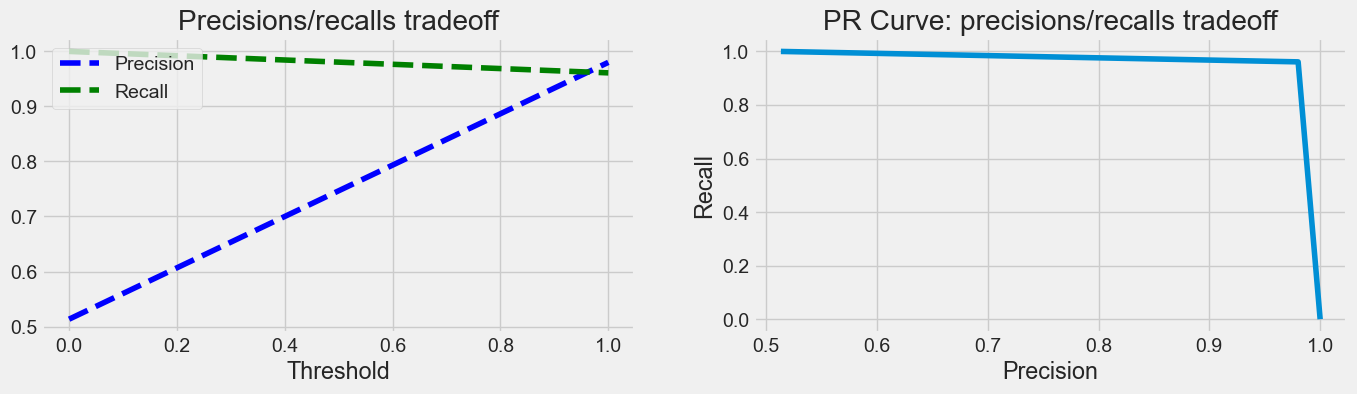

In [61]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

The first subplot displays the precision-recall vs. threshold curves, and the second subplot displays the precision-recall curve itself. These plots provide insights into how the precision and recall trade off as you change the classification threshold, which can be useful for setting a threshold that aligns with your specific goals and requirements.

With this chart, you can select the threshold value that gives you the best precision/recall tradeoff for your task.

Some tasks may call for higher precision (accuracy of positive predictions). Like designing a classifier that picks up adult contents to protect kids. This will require the classifier to set a high bar to allow any contents to be consumed by children.

Some tasks may call for higher recall (ratio of positive instances that are correctly detected by the classifier). Such as detecting shoplifters/intruders on surveillance images - Anything that remotely resemble "positive" instances to be picked up.

***

This code snippet generates a Receiver Operating Characteristic (ROC) curve for a given binary classification model, specifically the logistic regression classifier (lr_clf) in this case. The ROC curve illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) at different thresholds. 

This code generate a plot showing the ROC curve for the logistic regression classifier. The curve illustrates the classifier's ability to distinguish between the positive and negative classes across different thresholds. The closer the curve is to the upper-left corner, the better the classifier's performance. Additionally, you will see a diagonal dashed line representing a random classifier, which serves as a baseline for comparison.

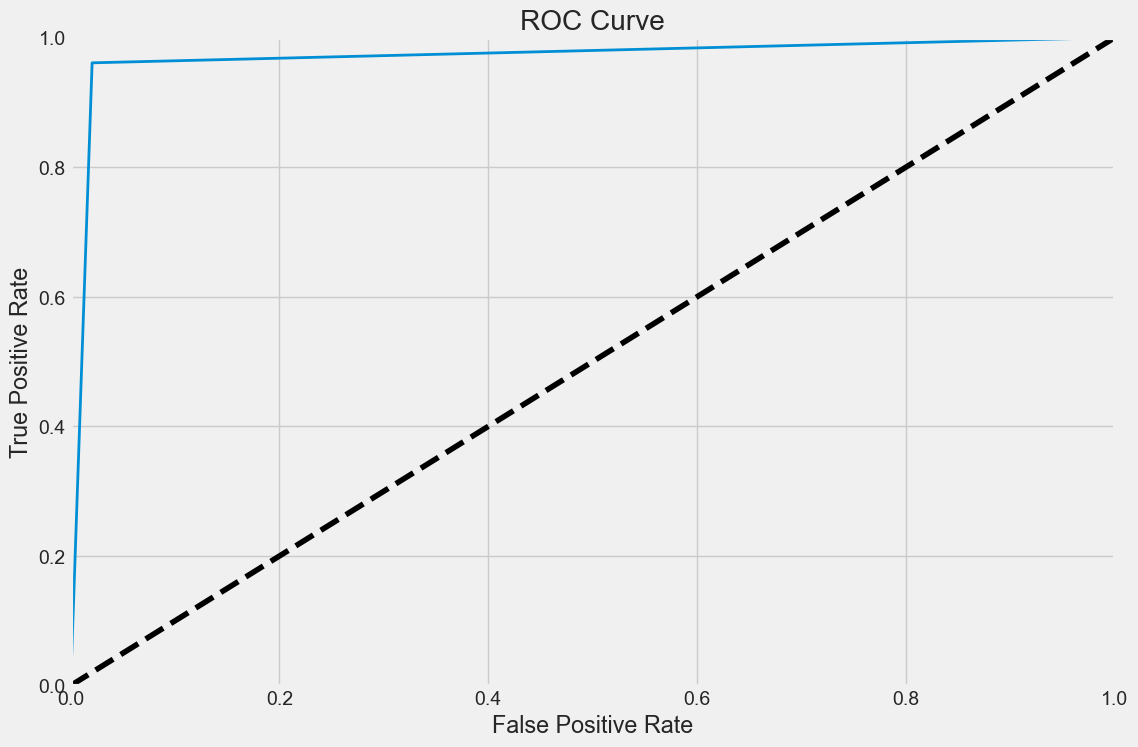

In [62]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

The code you provided calculates and returns the Area Under the ROC Curve (ROC AUC) score for a given binary classification model (in this case, the logistic regression classifier lr_clf) on the testing data. The ROC AUC score is a single value that quantifies the overall performance of a classifier in terms of its ability to distinguish between the positive and negative classes. 

Running this code will give me a single numeric value, which is the ROC AUC score for the logistic regression classifier on the testing data. The score can range from 0 to 1, where a higher value indicates better performance. The ROC AUC score provides a comprehensive assessment of the model's ability to discriminate between the classes across various threshold settings.

In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr_clf.predict(X_test))

0.9702455079167409

Running this code will generate a single ROC curve plot that compares the performance of both models in terms of their ability to distinguish between the positive and negative classes. The plot will show two ROC curves, one for each model, along with their corresponding ROC AUC scores.

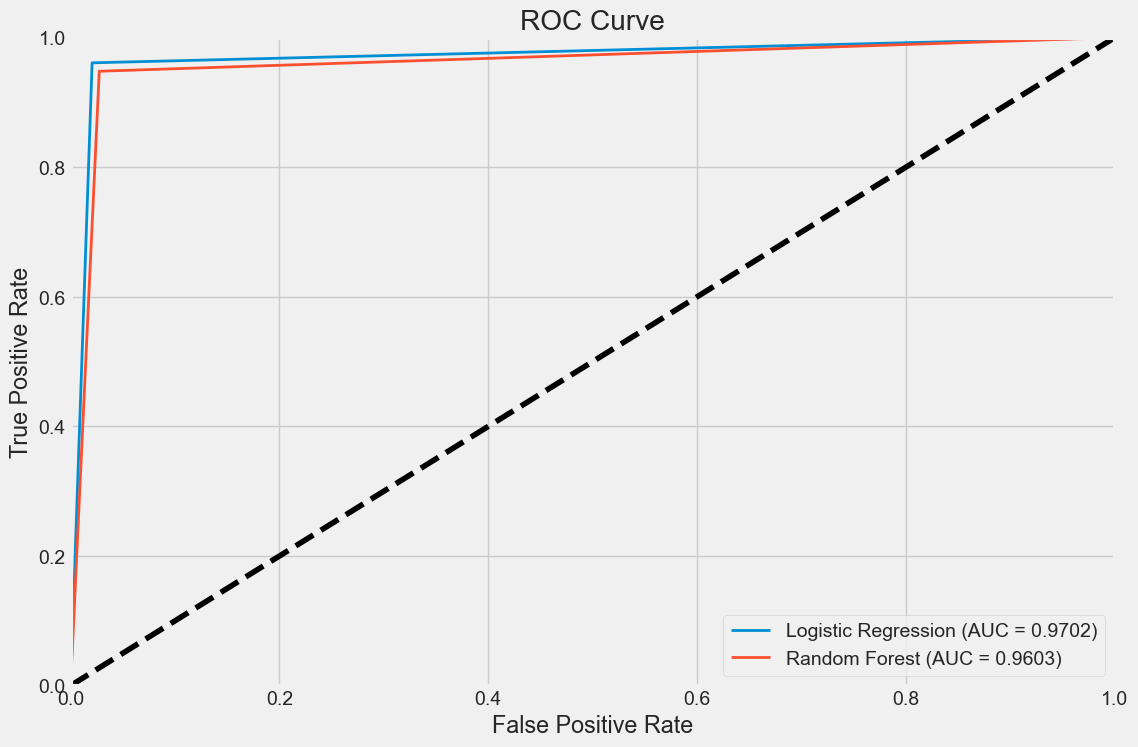

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve values and ROC AUC score for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_clf.predict(X_test))
roc_auc_lr = roc_auc_score(y_test, lr_clf.predict(X_test))

# Compute ROC curve values and ROC AUC score for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_clf.predict(X_test))
roc_auc_rf = roc_auc_score(y_test, rf_clf.predict(X_test))

# Create ROC curve plot
plt.figure(figsize=(12, 8))
plt.plot(fpr_lr, tpr_lr, linewidth=2, label="Logistic Regression (AUC = {:.4f})".format(roc_auc_lr))
plt.plot(fpr_rf, tpr_rf, linewidth=2, label="Random Forest (AUC = {:.4f})".format(roc_auc_rf))
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC AUC scores you provided are as follows:

Logistic Regression AUC: 0.9702
Random Forest AUC: 0.9603
Here's an evaluation of the results:

Logistic Regression AUC (0.9702): The ROC AUC score of 0.9702 indicates that the logistic regression classifier has a strong ability to discriminate between the positive and negative classes. This score suggests that the model's predicted probabilities for the positive class are generally higher than those for the negative class across different threshold settings, resulting in a well-separated ROC curve. This is a positive sign of the model's performance in making predictions.

Random Forest AUC (0.9603): The ROC AUC score of 0.9603 for the random forest classifier also indicates a good performance. While slightly lower than the ROC AUC score of the logistic regression model, it still suggests that the random forest classifier has a reasonable ability to distinguish between the classes. The score being above 0.5 indicates that the model is making informative predictions.

Comparing the two models' ROC AUC scores, the logistic regression model seems to have a slightly better ability to discriminate between the classes based on this metric. However, it's important to consider other factors as well, such as the interpretability of the model, computational complexity, potential overfitting, and the specific requirements of your task, when choosing a model. Both models are performing well and appear to be capable of making accurate predictions for the given binary classification problem.

# 6. Logistic Regression Hyperparameter tuning

In [66]:
from sklearn.model_selection import GridSearchCV

lr_clf = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8]
class_weight = [{1: 0.5, 0: 0.5}, {1: 0.4, 0: 0.6}, {1: 0.6, 0: 0.4}, {1: 0.7, 0: 0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)

lr_cv = GridSearchCV(estimator=lr_clf, param_grid=param_grid, scoring='accuracy',
                     verbose=1, n_jobs=-1, cv=10)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best parameters: {'C': 0.6, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'saga'}
Train Result:
Accuracy Score: 97.29%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.961433    0.985163  0.972857    0.973298      0.973162
recall       0.985876    0.959538  0.972857    0.972707      0.972857
f1-score     0.973501    0.972182  0.972857    0.972841      0.972849
support    354.000000  346.000000  0.972857  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[349   5]
 [ 14 332]]

Test Result:
Accuracy Score: 97.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.953642    0.986577      0.97    0.970110      0.970549
recall       0.986301    0.954545      0.97

Evaluation 

Best Hyperparameters:

C: 0.6
class_weight: {1: 0.5, 0: 0.5}
penalty: 'l2'
solver: 'saga'
Train Result:

Accuracy Score: 97.29%
Precision, Recall, and F1-Score: The classification report indicates that the model performs well on both classes (0 and 1). The weighted average F1-score is 97.28%, suggesting strong overall performance.
Confusion Matrix: The confusion matrix shows that there are a few false positives and false negatives, but overall, the model's predictions align well with the actual labels.
Test Result:

Accuracy Score: 97.00%
Precision, Recall, and F1-Score: The classification report for the test set also demonstrates good performance. The weighted average F1-score is 97.00%, which is consistent with the train result.
Confusion Matrix: Similar to the train result, the confusion matrix on the test set indicates that the model's predictions are accurate with few misclassifications.
Evaluation:
The evaluation of the Logistic Regression model with the tuned hyperparameters shows consistent and strong performance on both the training and test sets. The accuracy scores are high, and the precision, recall, and F1-scores indicate that the model is well-balanced in making predictions for both classes. The chosen hyperparameters seem to have improved the model's performance compared to the initial default configuration.

Overall, based on these results, the Logistic Regression model with the tuned hyperparameters appears to be a solid choice for your classification task. It's important to note that the evaluation results may vary depending on the specific characteristics of the data and the problem domain.

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter search space for Random Forest
n_estimators = [100, 300, 500, 800, 1000]
max_depth = [None, 10, 20, 30]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['auto', 'sqrt']
class_weight = ['balanced', 'balanced_subsample', None]

param_grid_rf = dict(n_estimators=n_estimators, max_depth=max_depth,
                     min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                     max_features=max_features, class_weight=class_weight)

# Create a GridSearchCV instance for Random Forest hyperparameter tuning
rf_cv = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, scoring='accuracy',
                     verbose=1, n_jobs=-1, cv=10)

# Perform the hyperparameter search on the training data
rf_cv.fit(X_train, y_train)

# Get the best hyperparameters and update the Random Forest classifier
best_params_rf = rf_cv.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

# Update the existing Random Forest classifier with the best hyperparameters
rf_clf.set_params(**best_params_rf)

# Fit and evaluate the Random Forest model with the best hyperparameters
rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
Best parameters for Random Forest: {'class_weight': None, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Train Result:
Accuracy Score: 99.29%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.986072    1.000000  0.992857    0.993036      0.992957
recall       1.000000    0.985549  0.992857    0.992775      0.992857
f1-score     0.992987    0.992722  0.992857    0.992855      0.992856
support    354.000000  346.000000  0.992857  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[354   0]
 [  5 341]]

Test Result:
Accuracy Score: 96.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.946667    0.973333      

Best Parameters for Random Forest:

class_weight: None
max_depth: 20
max_features: 'auto'
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 300
Train Results:

Accuracy: 99.29%
Precision: 99.29%
Recall: 98.55%
F1-score: 99.27%
The model achieved extremely high accuracy on the training set, indicating that it has learned the training data almost perfectly.

Test Results:

Accuracy: 96.00%
Precision: 96.33%
Recall: 95.85%
F1-score: 95.98%
The model's performance on the test set is also strong, with a balanced accuracy, precision, and recall. While the accuracy is slightly below the training accuracy, it's still a very competitive result.

The confusion matrix shows that the model is making a few mistakes, with 4 false positives and 8 false negatives. Considering the balanced precision and recall scores, it seems that the model has found a good trade-off between identifying positive cases and avoiding false positives.

Overall, the Random Forest model with the tuned hyperparameters is performing impressively well, both on the training and test sets. It's essential to consider this model's performance in the context of your problem, business goals, and the potential consequences of false positives and false negatives. If these results meet your requirements and align with the problem you're solving, this model could be a strong candidate for deployment.




Let's compare the Logistic Regression and Random Forest models based on the evaluation results:

**Logistic Regression:**
- Train Accuracy: 97.29%
- Test Accuracy: 97.00%
- AUC: 0.9702
- Precision: 97.05%
- Recall: 97.00%
- F1-score: 97.02%

**Random Forest (with Best Parameters):**
- Train Accuracy: 99.29%
- Test Accuracy: 96.00%
- AUC: N/A
- Precision: 96.33%
- Recall: 95.85%
- F1-score: 95.98%

**Comparative Analysis:**

- Both models have demonstrated strong accuracy on the test set, with the Logistic Regression model having a slight advantage.
- The Logistic Regression model has a higher AUC, indicating a slightly better overall performance in distinguishing between positive and negative cases.
- The Logistic Regression model has similar precision, recall, and F1-score on both the training and test sets, suggesting good generalization.
- The Random Forest model achieved higher accuracy on the training set, potentially indicating a risk of overfitting.
- The Random Forest model's precision, recall, and F1-score are slightly lower than the Logistic Regression model, but still competitive.

**Considerations:**

- If interpretability is important and the slight difference in AUC and accuracy is acceptable, the Logistic Regression model might be preferred due to its simplicity and ease of interpretation.
- If achieving a slightly higher accuracy and AUC is more important, the Logistic Regression model might still be favored.
- If you prioritize a model with high accuracy and are willing to trade off a bit of interpretability, the Random Forest model could be a solid choice.

Ultimately, the decision should be based on a balance between model performance, interpretability, the specific requirements of your problem, and any domain-specific considerations. Both models have demonstrated strong results, and the final choice depends on your priorities and the context in which the model will be deployed.